# Setup Spark environment 

In [ ]:
import time
import os

Start=time.time()
# Download and install tools 

# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download and Install Spark
!wget  -q http://apache.osuosl.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

# Install findspark
!pip install -q findspark

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

print(f"\nIt took {(time.time()-Start)} seconds to install all dependencies for spark to run on Google Colab. \n")



It took 33.99855899810791 seconds to install all dependencies for spark to run on Google Colab. 



# All files present in the data/mllib folder



- Spark ships with a good number of test data sets that can be used for all kinds of training and testing.

- This data can be explored by browsing to the installation path of Spark and checking out the folder marked `data`. 

In [ ]:
from pathlib import Path
from IPython.display import HTML

PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib"

files = [str(x).replace(PATH + "/", "") for x in Path(PATH).glob("**/*") if x.is_file()]
files.sort()
folders = [
    f"<font color='rgba(0, 0, 0, 87)' size='1'>{'/'.join(f.split('/')[:-1])}/</font>"  # folder part
    f"{f.split('/')[-1]}"  # file part
    for f in files
    if "/" in f
]
files = folders + [f for f in files if "/" not in f]

HTML(
    f"<font face='courier' size='2'>"
    f"<strong>All files present in the data/mllib folder:</strong><br />"
    f"{''.join([f'<li>{str(f)}</li>' for f in files])}"
    f"</font>"
)



# K-Means clustering 

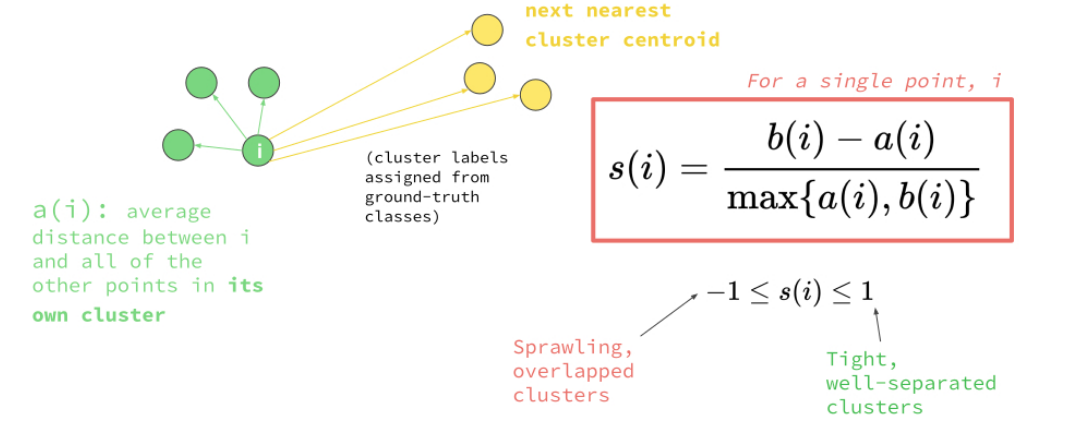

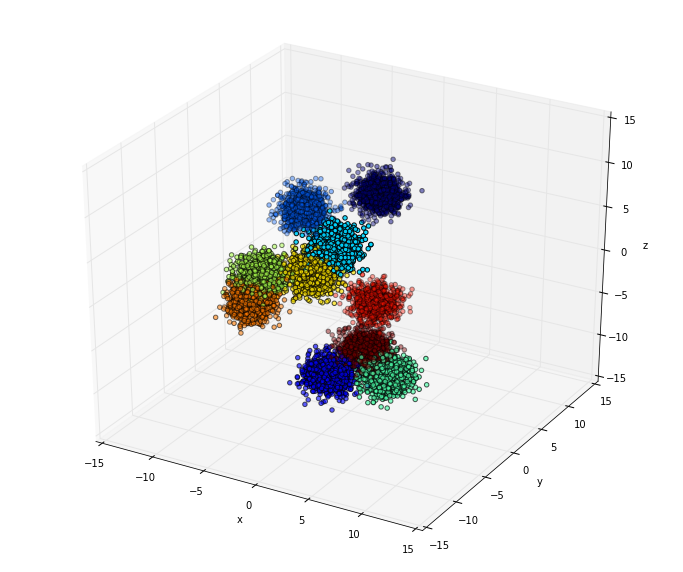

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.clustering import KMeans ,KMeansModel
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.

PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_kmeans_data.txt"

dataset = spark.read.format("libsvm").load(PATH)

# Trains a k-means model.
kmeans = KMeans().setK(6).setSeed(1)
model = kmeans.fit(dataset)

wssse= model.computeCost(dataset)
print('=================================================================')
print('Whithin set Sum of Squared Errors = ', str(wssse))
# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
print('=================================================================')

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
print('==============================')

for center in centers:
    print(center)

# Saving and loading models 
import os 
if os.path.exists('kmeans_model'):
  !rm -rf kmeans_model
  model.save('kmeans_model')
else:
  model.save('kmeans_model')

model_loaded=KMeansModel.load('kmeans_model')

Whithin set Sum of Squared Errors =  0.0
Silhouette with squared euclidean distance = 1.0
Cluster Centers: 
[9. 9. 9.]
[0. 0. 0.]
[0.1 0.1 0.1]
[0.2 0.2 0.2]
[9.1 9.1 9.1]
[9.2 9.2 9.2]


In [ ]:
dataset.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|           (3,[],[])|
|  1.0|(3,[0,1,2],[0.1,0...|
|  2.0|(3,[0,1,2],[0.2,0...|
|  3.0|(3,[0,1,2],[9.0,9...|
|  4.0|(3,[0,1,2],[9.1,9...|
|  5.0|(3,[0,1,2],[9.2,9...|
+-----+--------------------+



In [ ]:
dataset.toPandas()

,label,features
0,0.0,"(0.0, 0.0, 0.0)"
1,1.0,"(0.1, 0.1, 0.1)"
2,2.0,"(0.2, 0.2, 0.2)"
3,3.0,"(9.0, 9.0, 9.0)"
4,4.0,"(9.1, 9.1, 9.1)"
5,5.0,"(9.2, 9.2, 9.2)"


# Gaussian Mixture Model (GMM)

A Gaussian Mixture Model represents a composite distribution whereby points are drawn from one of k Gaussian sub-distributions, each with its own probability. The spark.ml implementation uses the expectation-maximization algorithm to induce the maximum-likelihood model given a set of samples.

[Link](https://spark.apache.org/docs/2.3.0/ml-clustering.html#gaussian-mixture-model-gmm)

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.ml.clustering import GaussianMixture

# Loads data.

PATH = "/content/spark-2.4.7-bin-hadoop2.7/data/mllib/sample_kmeans_data.txt"


# loads data
dataset = spark.read.format("libsvm").load(PATH)

gmm = GaussianMixture().setK(6).setSeed(24)
model = gmm.fit(dataset)


# Make predictions
predictions = model.transform(dataset)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
print('=================================================================')

"""
# Saving and loading models 
import os 
if os.path.exists('GMM_model'):
  !rm -rf kmeans_model
  model.save('GMM_model')
else:
  model.save('GMM_model')

model_loaded=KMeansModel.load('kmeans_model')


print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

"""

Silhouette with squared euclidean distance = 0.9997530305375207


'\n# Saving and loading models \nimport os \nif os.path.exists(\'GMM_model\'):\n  !rm -rf kmeans_model\n  model.save(\'GMM_model\')\nelse:\n  model.save(\'GMM_model\')\n\nmodel_loaded=KMeansModel.load(\'kmeans_model\')\n\n\nprint("Gaussians shown as a DataFrame: ")\nmodel.gaussiansDF.show(truncate=False)\n\n'

In [ ]:
model.gaussiansDF.toPandas().T

,0,1,2,3,4,5
mean,"[0.10000165647463438, 0.10000165647463438, 0.1...","[9.099999999999982, 9.099999999999982, 9.09999...","[0.10000184176000795, 0.10000184176000795, 0.1...","[0.10078139734440353, 0.10078139734440353, 0.1...","[0.10078228100278536, 0.10078228100278536, 0.1...","[0.09999600656626112, 0.09999600656626112, 0.0..."
cov,"DenseMatrix([[0.00666651, 0.00666651, 0.006666...","DenseMatrix([[0.00666667, 0.00666667, 0.006666...","DenseMatrix([[0.00666652, 0.00666652, 0.006666...","DenseMatrix([[0.00694943, 0.00694943, 0.006949...","DenseMatrix([[0.00695018, 0.00695018, 0.006950...","DenseMatrix([[0.00666648, 0.00666648, 0.006666..."
